# SupplyzPro: Technical Assessment

## Introduction
This notebook performs an exploratory data analysis on the industrial production dataset to understand its characteristics, including trends, seasonality, and stationarity.


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose



In [2]:
# Load Data
data = pd.read_csv('C:/Users/HP/Desktop/times_series_project/Datasets/IPG2211A2N.csv')
df = data.copy()

In [3]:
# Display the first few rows to explore the data
print("Data preview:")
print(data.head())

# Dataset information
print("\nDataset information:")
print(data.info())


Data preview:
         DATE  IPG2211A2N
0  1939-01-01      3.3336
1  1939-02-01      3.3591
2  1939-03-01      3.4354
3  1939-04-01      3.4608
4  1939-05-01      3.4608

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        1030 non-null   object 
 1   IPG2211A2N  1030 non-null   float64
dtypes: float64(1), object(1)
memory usage: 16.2+ KB
None


In [4]:
# change columns name
df.columns = ['Date', 'Production']

In [5]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set DATE as the index 
df.set_index('Date', inplace=True)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
Production    0
dtype: int64


In [6]:
# Descriptive statistics
data_stats = df.describe()

print("\nDescriptive statistics:")
print(df)


Descriptive statistics:
            Production
Date                  
1939-01-01      3.3336
1939-02-01      3.3591
1939-03-01      3.4354
1939-04-01      3.4608
1939-05-01      3.4608
...                ...
2024-06-01    109.1424
2024-07-01    120.0882
2024-08-01    118.4131
2024-09-01    104.6917
2024-10-01     96.2642

[1030 rows x 1 columns]


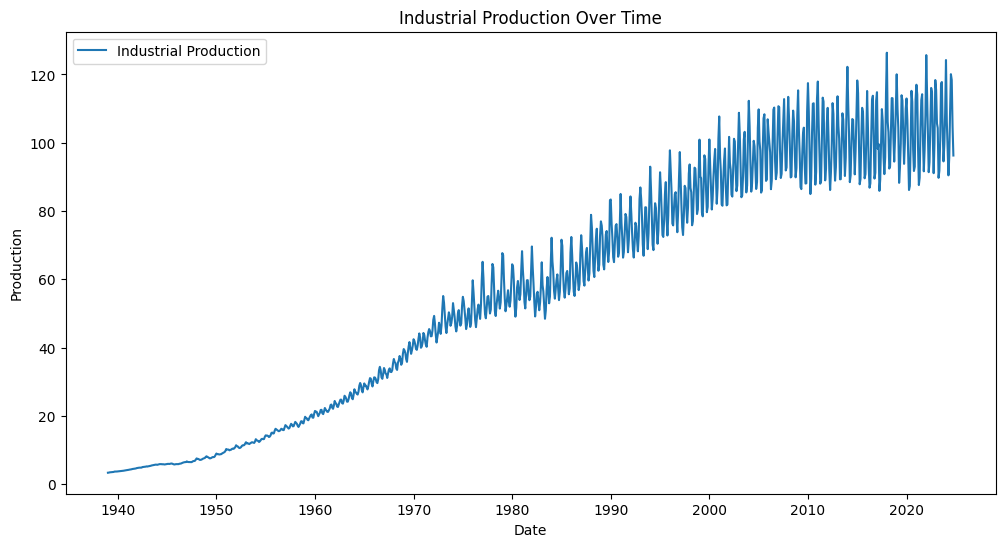

In [7]:

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(df, label='Industrial Production')
plt.title('Industrial Production Over Time')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()



The plot above shows the evolution of industrial production over time. A general upward trend is observed, with significant growth starting in the 1950s. However, seasonal and cyclical fluctuations are visible throughout the period. These variations can be attributed to various economic, political, and technological factors.

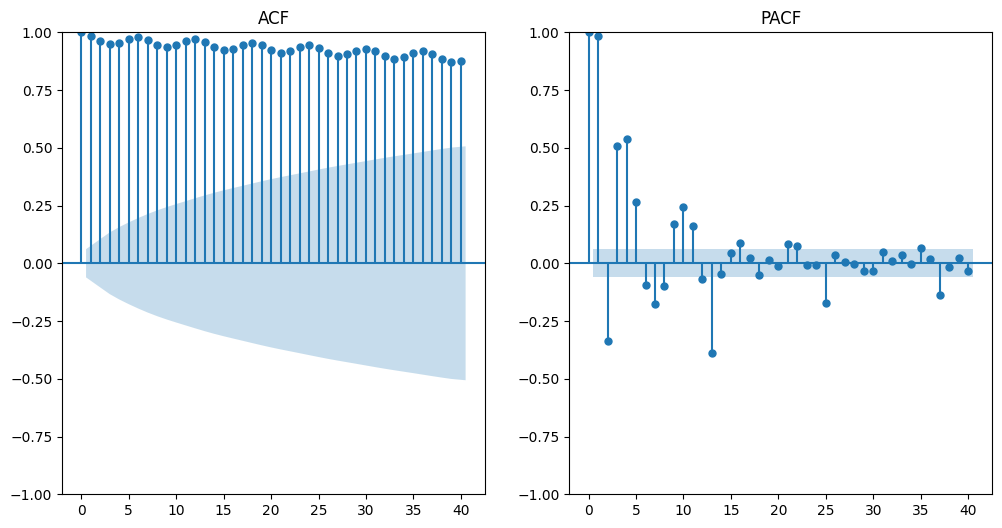

In [8]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Production'], ax=plt.gca(), lags=40)
plt.title('ACF')

plt.subplot(122)
plot_pacf(df['Production'], ax=plt.gca(), lags=40)
plt.title('PACF')
plt.show()

ACF Plot:

Significant Lags: The ACF plot shows significant spikes at lags 1, 2, and possibly 3. This suggests that the time series is influenced by its recent past values.

PACF Plot:

Significant Lags: The PACF plot shows significant spikes at lags 1 and 2. This indicates that the current value of the time series is directly influenced by the previous two values.

In [9]:
# Perform the ADF test
result = adfuller(df['Production'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value {key}: {value}')

ADF Statistic: -0.7144157341270568
p-value: 0.8429801190131591
Critical Value 1%: -3.436860474327014
Critical Value 5%: -2.8644144230916537
Critical Value 10%: -2.568300476140699


Since the p-value (0.8429) is much larger than the significance levels (0.01, 0.05, 0.10), we fail to reject the null hypothesis. This indicates that the time series is non-stationary.

## Applying Differencing to Make a Time Series Stationary

Differencing is a technique used to remove trends and seasonality from a time series, making it stationary. It involves subtracting the previous observation from the current observation.

<Axes: xlabel='Date'>

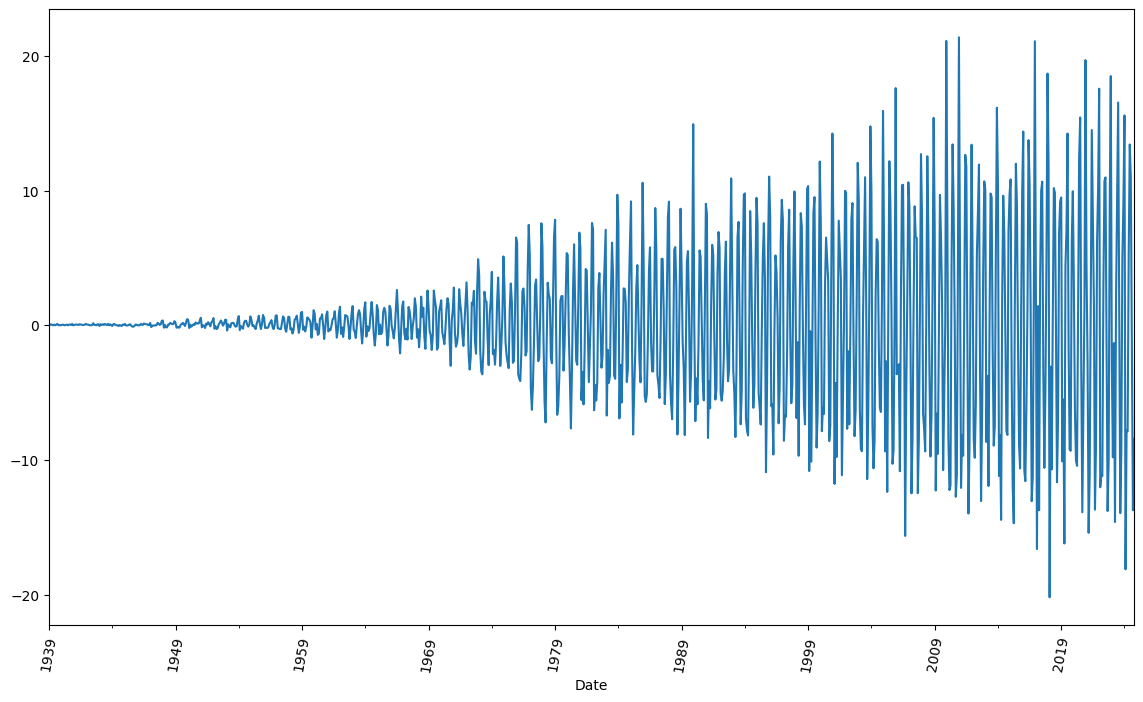

In [10]:
df['Diff_1'] = df['Production'] - df['Production'].shift(1)
df['Diff_1'].plot(rot = 80, figsize = (14,8))

In [11]:
result = adfuller(df['Diff_1'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -10.34561526534457
p-value: 2.615847203441381e-18
Critical Values:
	1%: -3.436866962597422
	5%: -2.864417284603703
	10%: -2.5683020002450507


In [12]:
# Prepare the data: Log transformation to stabilize variance
df['Log_Production'] = np.log(df['Production'])

# Differencing to remove trend
df['Diff_Production'] = df['Log_Production'].diff().dropna()

# Seasonal differencing
df['Seasonal_Diff_Production'] = df['Diff_Production'].diff(12).dropna()

<Axes: xlabel='Date'>

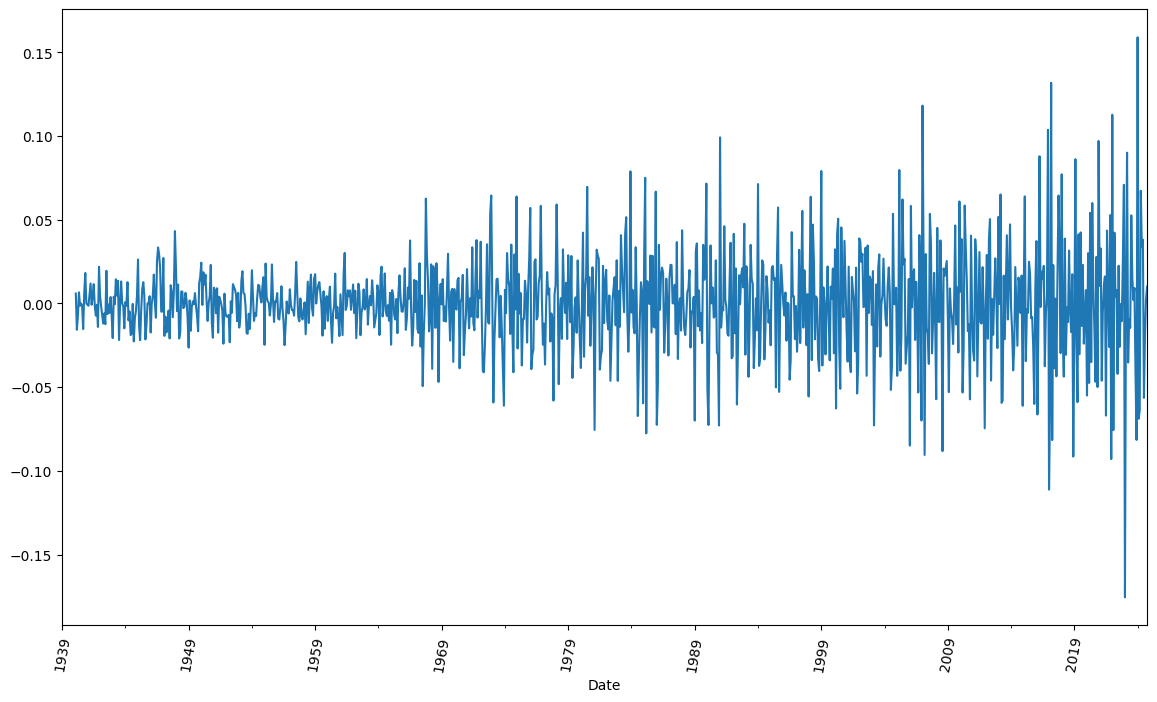

In [13]:
df['Seasonal_Diff_Production'].plot(rot = 80, figsize = (14,8))

Analyzing the Transformed Data

Log Transformation:

Purpose: To stabilize the variance of the time series. When the variance of the data increases with the level of the data, log transformation can help to equalize the variance.

Differencing:

Purpose: To remove trends and seasonality from the time series.
First-order differencing: Subtracting the previous observation from the current observation to remove a linear trend.
Seasonal differencing: Subtracting the observation from the same period in the previous year to remove seasonal patterns.

Interpreting the Plot of the Seasonally Differenced Data:

The plot shows the transformed data after applying both log and seasonal differencing. 

Reduced Variability: The amplitude of the fluctuations is significantly smaller compared to the original data. This suggests that the log transformation has helped to stabilize the variance.

Removal of Trend: The upward trend that might have been present in the original data has been eliminated.

Seasonal Pattern: The seasonal peaks and troughs seem to be less pronounced, indicating that the seasonal differencing has been effective in removing the seasonal component.

Overall, the transformed data appears to be more stationary and suitable for time series modeling.

Based on all plots and ADF test results, the best result will be taking the seasonal difference with the log trasnformation. So, this is df['Seasonal_Diff_Production'].

## ACF & PACF

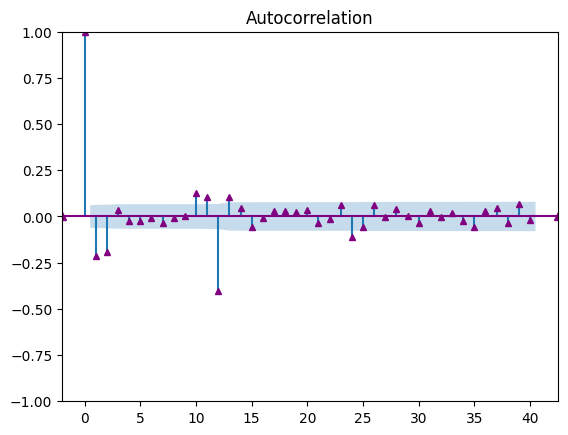

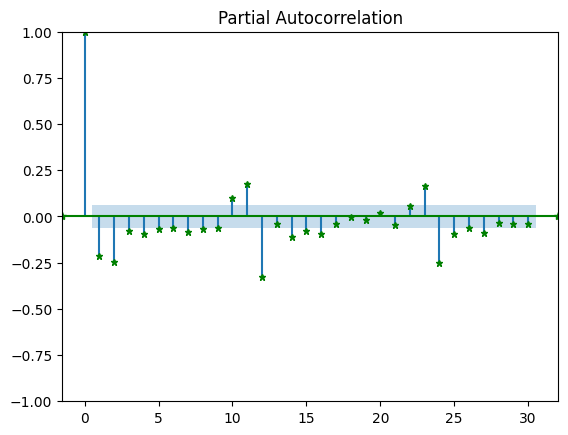

In [14]:
acf_seasonal = plot_acf(df['Seasonal_Diff_Production'].dropna(), lags = 40, color = "purple", marker = "^")
pacf_plot = plot_pacf(df['Seasonal_Diff_Production'].dropna(), lags = 30, color = "Green", marker = "*")

Analyzing ACF and PACF Plots for ARIMA/SARIMA Model Selection

Understanding the Plots

ACF (Autocorrelation Function): Measures the correlation between a time series and its lagged values.
PACF (Partial Autocorrelation Function): Measures the direct correlation between a time series and its lagged values, controlling for the effects of intermediate lags.
Interpreting the Plots

ACF Plot:

Significant spikes at lags 1, 2, and possibly 3. This suggests that the time series is influenced by its recent past values.
PACF Plot:

Significant spikes at lags 1 and 2. This indicates that the current value of the time series is directly influenced by the previous two values.

Model Selection

Based on the ACF and PACF plots, we can consider the following ARIMA or SARIMA models:

ARIMA Model:

AR(2): Since the PACF shows significant spikes at lags 1 and 2, an AR(2) model might be appropriate. This model assumes that the current value depends on the previous two values.
SARIMA Model:

SARIMA(2,1,2)(1,1,1)[12]: If there is a clear seasonal pattern in the data, a SARIMA model can be considered. The seasonal component (1,1,1)[12] indicates that the seasonal pattern repeats every 12 periods (e.g., monthly data with yearly seasonality).
Choosing Lags for AR and MA Components:

AR Components: The significant lags in the PACF plot suggest that we should include AR terms up to lag 2.
MA Components: The significant lags in the ACF plot suggest that we should include MA terms up to lag 2.
Integrated Component:

Differencing: If the time series is non-stationary (has a trend or seasonal pattern), we may need to difference the data to make it stationary. The degree of differencing (d) can be determined by examining the ACF and PACF plots. If the ACF plot shows a slow decay or a significant spike at lag 1, differencing might be necessary.